# Setup Path dan Impor Modul

In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Menambahkan path ke direktori utama agar bisa mengimpor modul noventis
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Impor kelas yang akan digunakan
from noventis.data_cleaner import NoventisImputer
print('Successfully imported modules!')

Successfully imported modules!


# Memuat Dataset

In [2]:
try:
    df_ames = pd.read_csv('../dataset/AmesHousing.csv')
    print("Dataset Ames Housing berhasil dimuat.")
except FileNotFoundError:
    print("Error: Pastikan file 'train.csv' dari dataset Ames Housing ada di direktori yang sama dengan notebook Anda.")

Dataset Ames Housing berhasil dimuat.


# Cek Nilai yang Hilang (Null Values)

In [3]:
# --- Sel 3: Cek Nilai yang Hilang (Null Values) ---
print("Analisis Awal: 15 kolom dengan nilai hilang terbanyak")
null_counts = df_ames.isnull().sum()
print(null_counts[null_counts > 0].sort_values(ascending=False).head(15))

Analisis Awal: 15 kolom dengan nilai hilang terbanyak
Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Mas Vnr Type      1775
Fireplace Qu      1422
Lot Frontage       490
Garage Cond        159
Garage Qual        159
Garage Finish      159
Garage Yr Blt      159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Cond           80
dtype: int64


# Contoh 1 - Menggunakan Mode Otomatis

In [4]:
# --- Sel 4: Contoh 1 - Menggunakan Mode Otomatis ---
print("--- Menjalankan Imputer dengan Mode Otomatis ---")

# 1. Inisialisasi imputer (mode otomatis adalah default)
imputer_auto = NoventisImputer()

# 2. Buat salinan data agar data asli tidak berubah
df_imputed_auto = imputer_auto.fit_transform(df_ames.copy())

# 3. Verifikasi hasilnya
print(f"\nTotal nilai null setelah proses: {df_imputed_auto.isnull().sum().sum()}")
print("Contoh kolom 'LotFrontage' (diisi dengan rata-rata):")
display(df_imputed_auto[df_ames['Lot Frontage'].isnull()][['Lot Frontage']].head())

--- Menjalankan Imputer dengan Mode Otomatis ---

Total nilai null setelah proses: 0
Contoh kolom 'LotFrontage' (diisi dengan rata-rata):


,Lot Frontage
11,69.0
14,69.0
22,69.0
23,69.0
24,69.0


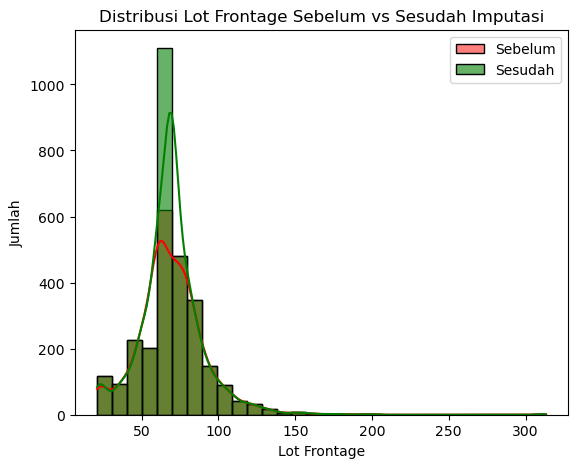

In [5]:
# Buat data sebelum dan sesudah imputasi
lot_frontage_before = df_ames['Lot Frontage']
lot_frontage_after = df_imputed_auto['Lot Frontage']

plt.figure(figsize=(14, 5))

# Histogram perbandingan
plt.subplot(1, 2, 1)
sns.histplot(lot_frontage_before, kde=True, color='red', label='Sebelum', bins=30)
sns.histplot(lot_frontage_after, kde=True, color='green', label='Sesudah', bins=30, alpha=0.6)
plt.title('Distribusi Lot Frontage Sebelum vs Sesudah Imputasi')
plt.xlabel('Lot Frontage')
plt.ylabel('Jumlah')
plt.legend()

# Contoh 2 - Menggunakan Metode Spesifik per Kolom

In [6]:
# --- Sel 5: Contoh 2 - Menggunakan Metode Spesifik per Kolom ---
print("\n--- Menjalankan Imputer dengan Metode Spesifik ---")

# Tentukan metode untuk setiap kolom yang memiliki null
method_map = {
    'LotFrontage': 'median',       # Gunakan median untuk umur
    'Alley': 'mode',               # Gunakan modus
    'MasVnrArea': 'mean',          # Gunakan rata-rata
    'FireplaceQu': 'mode'
    # Kolom lain yang tidak ada di map akan diabaikan jika 'default_method' tidak diset
}

# 1. Inisialisasi imputer dengan peta metode
imputer_manual = NoventisImputer(method=method_map)

# 2. Fit dan transform data
df_imputed_manual = imputer_manual.fit_transform(df_ames.copy())

# 3. Verifikasi hasilnya
print(f"\nTotal nilai null setelah proses: {df_imputed_manual.isnull().sum().sum()}")
print("Contoh kolom 'LotFrontage' (diisi dengan median):")
display(df_imputed_manual[df_ames['Lot Frontage'].isnull()][['Lot Frontage']].head())


--- Menjalankan Imputer dengan Metode Spesifik ---

Total nilai null setelah proses: 0
Contoh kolom 'LotFrontage' (diisi dengan median):


,Lot Frontage
11,69.0
14,69.0
22,69.0
23,69.0
24,69.0


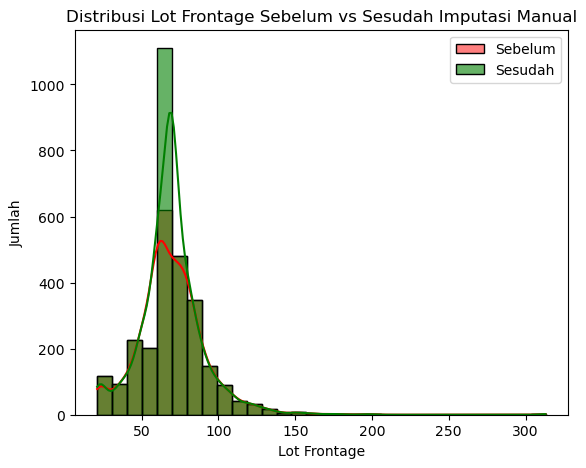

In [7]:
# Buat data sebelum dan sesudah imputasi
lot_frontage_before = df_ames['Lot Frontage']
lot_frontage_after = df_imputed_manual['Lot Frontage']

plt.figure(figsize=(14, 5))

# Histogram perbandingan
plt.subplot(1, 2, 1)
sns.histplot(lot_frontage_before, kde=True, color='red', label='Sebelum', bins=30)
sns.histplot(lot_frontage_after, kde=True, color='green', label='Sesudah', bins=30, alpha=0.6)
plt.title('Distribusi Lot Frontage Sebelum vs Sesudah Imputasi Manual')
plt.xlabel('Lot Frontage')
plt.ylabel('Jumlah')
plt.legend()

# Contoh 3 - Menggunakan KNN Imputer

In [8]:
# --- Sel 6: Contoh 3 - Menggunakan KNN Imputer ---
print("\n--- Menjalankan Imputer dengan Metode KNN ---")

# 1. Inisialisasi imputer dengan metode 'knn'
imputer_knn = NoventisImputer(method='knn', n_neighbors=5)

# 2. Fit dan transform data
df_imputed_knn = imputer_knn.fit_transform(df_ames.copy())

# 3. Verifikasi hasilnya
print(f"\nTotal nilai null setelah proses: {df_imputed_knn.isnull().sum().sum()}")
print("Contoh kolom 'LotFrontage' (diisi dengan estimasi KNN):")
display(df_imputed_knn[df_ames['Lot Frontage'].isnull()][['Lot Frontage']].head())


--- Menjalankan Imputer dengan Metode KNN ---

Total nilai null setelah proses: 0
Contoh kolom 'LotFrontage' (diisi dengan estimasi KNN):


,Lot Frontage
11,74.0
14,48.8
22,77.8
23,64.8
24,64.8


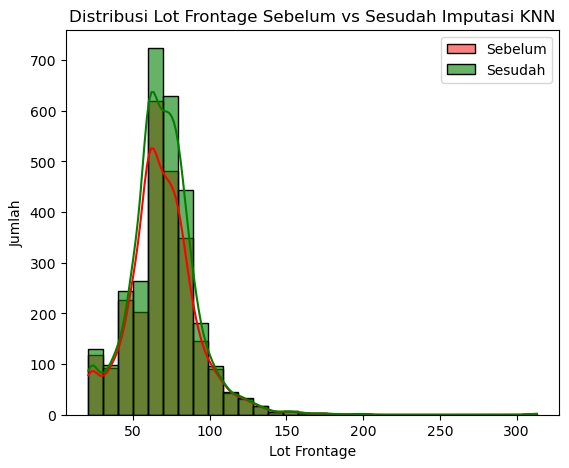

In [9]:
# Buat data sebelum dan sesudah imputasi
lot_frontage_before = df_ames['Lot Frontage']
lot_frontage_after = df_imputed_knn['Lot Frontage']

plt.figure(figsize=(14, 5))

# Histogram perbandingan
plt.subplot(1, 2, 1)
sns.histplot(lot_frontage_before, kde=True, color='red', label='Sebelum', bins=30)
sns.histplot(lot_frontage_after, kde=True, color='green', label='Sesudah', bins=30, alpha=0.6)
plt.title('Distribusi Lot Frontage Sebelum vs Sesudah Imputasi KNN')
plt.xlabel('Lot Frontage')
plt.ylabel('Jumlah')
plt.legend()